# Loading Data:

In [ ]:
import pandas as pd
import numpy as np
data=pd.read_csv("/Users/jaderazzaghi/Desktop/NLP/twitter16.csv", encoding='latin1', header=None)

In [ ]:
data.sample(7)

,0,1,2,3,4,5
483473,0,2180413246,Mon Jun 15 10:26:12 PDT 2009,NO_QUERY,YankeesRule1313,I'm really enhoying my luch break...do I have ...
662700,0,2243731384,Fri Jun 19 13:49:38 PDT 2009,NO_QUERY,Abercrombie12,"getting ready for work , ugh im dreading this ..."
151689,0,1932570227,Tue May 26 21:44:26 PDT 2009,NO_QUERY,caitdeen,@rokeyes My last day of summer school...for th...
541566,0,2200139397,Tue Jun 16 18:29:33 PDT 2009,NO_QUERY,JillNYC21,@TIBlockhead At least she did Scranton. But sh...
959793,4,1826175797,Sun May 17 07:52:27 PDT 2009,NO_QUERY,meshaunjay,I am ready to show the world what i'm made of
804883,4,1468584738,Tue Apr 07 02:33:39 PDT 2009,NO_QUERY,silent_dream,SARAH! told you I'd figure one out
307028,0,2000376589,Mon Jun 01 21:59:07 PDT 2009,NO_QUERY,cupcakecutee,i hate this computer! it's so effing slow!


# only get the tweets and sentiments:


In [ ]:
data=data[[5,0]] # to get only col 5 & 0 that contain tweets and labels

In [ ]:
#now lets rename them:
data.columns=["tweets","sentiment"]

In [ ]:
data.head()

,tweets,sentiment
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


In [ ]:
# we have to see how many sentiment:
data['sentiment'].value_counts()

0    800000
4    248576
Name: sentiment, dtype: int64

In [ ]:
#so now we identify the sentiment numbers to neg pos:
sent_map={0: 'negative', 4:'positive'}

# Word_counts: 

In [ ]:
data["word_counts"]=data['tweets'].apply(lambda x: len(str(x).split()))
data.head()

,tweets,sentiment,word_counts
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19
1,is upset that he can't update his Facebook by ...,0,21
2,@Kenichan I dived many times for the ball. Man...,0,18
3,my whole body feels itchy and like its on fire,0,10
4,"@nationwideclass no, it's not behaving at all....",0,21


# Char counts:

In [ ]:
data["char_counts"]=data['tweets'].apply(lambda x: len(x))
data.head()

,tweets,sentiment,word_counts,char_counts
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115
1,is upset that he can't update his Facebook by ...,0,21,111
2,@Kenichan I dived many times for the ball. Man...,0,18,89
3,my whole body feels itchy and like its on fire,0,10,47
4,"@nationwideclass no, it's not behaving at all....",0,21,111


# Average word len:

In [ ]:
def get_avg(x):
    word=x.split()
    word_len=0
    for w in word:
        word_len=word_len+len(w)
    return (word_len/len(word)) 

In [ ]:
x="l love coffee"
w=x.split()
y=len("".join(w))
print(y)
print(y/len(w))

total=0
for t in w:
    total=total+len(t)
print (total/len(w))

11
3.6666666666666665
3.6666666666666665


In [ ]:
data['avg_len']=data['tweets'].apply(lambda x: get_avg(x))

In [ ]:
data.head()

,tweets,sentiment,word_counts,char_counts,avg_len
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444
3,my whole body feels itchy and like its on fire,0,10,47,3.700000
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714


In [ ]:
115/19 # this is because it skips the special characters & white spcace

6.052631578947368

In [ ]:
# to fix it and get rid of the space:


# Stopwords:


In [ ]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

In [ ]:
data["stop_wd_count"]= data['tweets'].apply(lambda x: len([t for t in x.split() if t in STOP_WORDS ]))

In [ ]:
data.head()

,tweets,sentiment,word_counts,char_counts,avg_len,stop_wd_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10


# Hashtags & Mentions count:


In [ ]:
# we use the command .startswith(''):
data["count_mention"]=data['tweets'].apply(lambda x: len([t for t in x.split() if t.startswith('@')]))
data["hashtag_count"]=data['tweets'].apply(lambda x: len([t for t in x.split()if t.startswith('#')]))

In [ ]:
data.head()

,tweets,sentiment,word_counts,char_counts,avg_len,stop_wd_count,count_mention,hashtag_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4,1,0
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9,0,0
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7,1,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,1,0


# if num is in data:

In [ ]:
data['count_digit']=data['tweets'].apply(lambda x: len([t for t in x.split() if t.isdigit()]))

In [ ]:
data.head()

,tweets,sentiment,word_counts,char_counts,avg_len,stop_wd_count,count_mention,hashtag_count,count_digit
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4,1,0,0
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9,0,0,0
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7,1,0,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,1,0,0


# if uppercase:

In [ ]:
data["count_uppercase"]=data['tweets'].apply(lambda x: len([t for t in x.split() if t.isupper()]))

In [ ]:
data.head()

,tweets,sentiment,word_counts,char_counts,avg_len,stop_wd_count,count_mention,hashtag_count,count_digit,count_uppercase
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4,1,0,0,1
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9,0,0,0,0
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7,1,0,0,1
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,1,0,0,1


# how to access certain tweets in df:


In [ ]:
#loc: have to specify row and col by name
data.loc[96]['tweets']

"so rylee,grace...wana go steve's party or not?? SADLY SINCE ITS EASTER I WNT B ABLE 2 DO MUCH  BUT OHH WELL....."

In [ ]:
#iloc: have to specify row and col by integer
data.iloc[96][0]

"so rylee,grace...wana go steve's party or not?? SADLY SINCE ITS EASTER I WNT B ABLE 2 DO MUCH  BUT OHH WELL....."

# cleaning:

In [ ]:
# lower case:
data['tweets'].apply(lambda x: x.lower())

0          @switchfoot http://twitpic.com/2y1zl - awww, t...
1          is upset that he can't update his facebook by ...
2          @kenichan i dived many times for the ball. man...
3            my whole body feels itchy and like its on fire 
4          @nationwideclass no, it's not behaving at all....
                                 ...                        
1048571             my grandma is making dinenr with my mum 
1048572    mid-morning snack time... a bowl of cheese noo...
1048573    @shadela same here  say it like from the termi...
1048574               @destinyhope92 im great thaanks  wbuu?
1048575                 cant wait til her date this weekend 
Name: tweets, Length: 1048576, dtype: object

In [ ]:
data.head()

,tweets,sentiment,word_counts,char_counts,avg_len,stop_wd_count,count_mention,hashtag_count,count_digit,count_uppercase
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4,1,0,0,1
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9,0,0,0,0
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7,1,0,0,1
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,1,0,0,1


In [ ]:
#contraction to expansion:
contractions = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"i'd": "i had / i would",
"i'd've": "i would have",
"i'll": "i shall / I will",
"i'll've": "i shall have / i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

In [ ]:
contractions["you're"]

'you are'

In [ ]:
def exp(x):
    if type(x) is str:
        for key in contractions:
            value=contractions[key]
            x=x.replace(key,value)
        return x
    else:
        return x

In [ ]:
%%time
data['tweets'].apply(lambda x: exp(x))

CPU times: user 22.8 s, sys: 197 ms, total: 23 s
Wall time: 24.4 s


0          @switchfoot http://twitpic.com/2y1zl - Awww, t...
1          is upset that he cannot update his Facebook by...
2          @Kenichan I dived many times for the ball. Man...
3            my whole body feels itchy and like its on fire 
4          @nationwideclass no, it has / it is not behavi...
                                 ...                        
1048571             My GrandMa is making Dinenr with my Mum 
1048572    Mid-morning snack time... A bowl of cheese noo...
1048573    @ShaDeLa same here  say it like from the Termi...
1048574               @DestinyHope92 im great thaanks  wbuu?
1048575                 cant wait til her date this weekend 
Name: tweets, Length: 1048576, dtype: object

# Remove emails:


In [1]:
import re

In [2]:
x='this is my email: jaderazzaghi@gmail.com'

In [3]:
re.findall(r'([a-zA-Z0-9+_.-]+@[a-zA-Z0-9.-]+\.[a-zA-Z0-9_-]+)',x)

['jaderazzaghi@gmail.com']

In [4]:
data['emails']=data['tweets'].apply(lambda x: re.findall(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)',x))

NameError: ignored

In [ ]:
data['email_count']=data['emails'].apply(lambda x: len(x))

In [ ]:
data[data['email_count']>0]

In [ ]:
#removing:
data['tweets']=data['tweets'].apply(lambda x: re.sub(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)',"",x))

In [ ]:
data.head()

# count URLs and remove:


In [ ]:
data['Url']=data['tweets'].apply(lambda x: re.findall(r"(http|ftp|https):\/\/([\w\-_]+(?:(?:\.[\w\-_]+)+))([\w\-\.,@?^=%&:/~\+#]*[\w\-\@?^=%&/~\+#])?",x))

In [ ]:
data['Url_count']=data['Url'].apply(lambda x: len(x))

In [ ]:
data[data['Url_count']>0]

,tweets,sentiment,word_counts,char_counts,avg_len,stop_wd_count,count_mention,hashtag_count,count_digit,count_uppercase,emails,email_count,Url,Url_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4,1,0,0,1,[],0,"[(http, twitpic.com, /2y1zl)]",1
37,@MissXu sorry! bed time came here (GMT+1) ht...,0,8,61,6.500000,1,1,0,0,1,[],0,"[(http, is.gd, /fNge)]",1
50,Broadband plan 'a massive broken promise' http...,0,15,129,7.600000,4,0,0,0,0,[],0,"[(http, tinyurl.com, /dcuc33)]",1
74,Why won't you show my location?! http://twit...,0,7,59,7.285714,3,0,0,0,0,[],0,"[(http, twitpic.com, /2y2es)]",1
95,Strider is a sick little puppy http://apps.fa...,0,7,85,11.142857,2,0,0,0,0,[],0,"[(http, apps.facebook.com, /dogbook/profile/vi...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048512,is back from the theater. A Night at the Museu...,4,16,100,5.250000,7,0,0,1,1,[],0,"[(http, plurk.com, /p/x0vzs)]",1
1048525,"@MasterCardNews Bet on the Final, Get À_25 ca...",4,13,97,6.461538,4,1,0,0,1,[],0,"[(http, tinyurl.com, /qhoq8j)]",1
1048526,says haha. parang wla ako sa work. ang inaatup...,4,16,112,6.000000,1,0,0,0,0,[],0,"[(http, plurk.com, /p/x0w0x)]",1
1048551,and this http://bit.ly/19bJGz,4,3,30,9.000000,2,0,0,0,0,[],0,"[(http, bit.ly, /19bJGz)]",1


In [ ]:
# remove:
data['tweets']=data['tweets'].apply(lambda x: re.sub(r'(http|ftp|https):\/\/([\w\-_]+(?:(?:\.[\w\-_]+)+))([\w\-\.,@?^=%&:/~\+#]*[\w\-\@?^=%&/~\+#])?',"",x))

In [ ]:
data.loc[0]["tweets"]

"@switchfoot  - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

# remove rt:

In [ ]:
data['tweets']=data['tweets'].apply(lambda x: re.sub('RT',"",x))

# Removing Special Characters:

In [ ]:
data['tweets']=data['tweets'].apply(lambda x: re.sub(r'[^A-Z a-z 0-9-]+', "",x))

In [ ]:
data.head()

,tweets,sentiment,word_counts,char_counts,avg_len,stop_wd_count,count_mention,hashtag_count,count_digit,count_uppercase,emails,email_count,Url,Url_count
0,switchfoot - Awww thats a bummer You shoulda...,0,19,115,5.052632,4,1,0,0,1,[],0,"[(http, twitpic.com, /2y1zl)]",1
1,is upset that he cant update his Facebook by t...,0,21,111,4.285714,9,0,0,0,0,[],0,[],0
2,Kenichan I dived many times for the ball Manag...,0,18,89,3.944444,7,1,0,0,1,[],0,[],0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,[],0,[],0
4,nationwideclass no its not behaving at all im ...,0,21,111,4.285714,10,1,0,0,1,[],0,[],0


## Remove multiple spaces:

In [ ]:
data['tweets']=data['tweets'].apply(lambda x: " ".join(x.split()))

In [ ]:
data.head()

,tweets,sentiment,word_counts,char_counts,avg_len,stop_wd_count,count_mention,hashtag_count,count_digit,count_uppercase,emails,email_count,Url,Url_count
0,switchfoot - Awww thats a bummer You shoulda g...,0,19,115,5.052632,4,1,0,0,1,[],0,"[(http, twitpic.com, /2y1zl)]",1
1,is upset that he cant update his Facebook by t...,0,21,111,4.285714,9,0,0,0,0,[],0,[],0
2,Kenichan I dived many times for the ball Manag...,0,18,89,3.944444,7,1,0,0,1,[],0,[],0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,[],0,[],0
4,nationwideclass no its not behaving at all im ...,0,21,111,4.285714,10,1,0,0,1,[],0,[],0


# remove HTML tags

In [ ]:
from bs4 import BeautifulSoup
        

In [ ]:
x='<html><h2>Thank you Jade!</h></html>'

In [ ]:
BeautifulSoup(x,'lxml').get_text()

'Thank you Jade!'

In [ ]:
%%time
data['tweets']=data['tweets'].apply(lambda x:BeautifulSoup(x,'lxml').get_text())

CPU times: user 4min 4s, sys: 18.9 s, total: 4min 23s
Wall time: 4min 44s


# Remove Stopwords

In [ ]:
x='this is the lamp on this'
" ".join([t for t in x.split() if t not in STOP_WORDS])

'lamp'

In [ ]:
data['tweets']=data['tweets'].apply(lambda x: " ".join([t for t in x.split() if t not in STOP_WORDS]))

In [ ]:
data.head()

,tweets,sentiment,word_counts,char_counts,avg_len,stop_wd_count,count_mention,hashtag_count,count_digit,count_uppercase,emails,email_count,Url,Url_count
0,switchfoot - Awww thats bummer You shoulda got...,0,19,115,5.052632,4,1,0,0,1,[],0,"[(http, twitpic.com, /2y1zl)]",1
1,upset cant update Facebook texting cry result ...,0,21,111,4.285714,9,0,0,0,0,[],0,[],0
2,Kenichan I dived times ball Managed save 50 Th...,0,18,89,3.944444,7,1,0,0,1,[],0,[],0
3,body feels itchy like fire,0,10,47,3.700000,5,0,0,0,0,[],0,[],0
4,nationwideclass behaving im mad I cant,0,21,111,4.285714,10,1,0,0,1,[],0,[],0


# lemmatization and stemming

In [ ]:
nlp=spacy.load('en_core_web_sm')

In [ ]:
x='Kenichan I dived times ball Managed save 50 rest'

In [ ]:
def base(x):
    x_list=[]
    doc=nlp(x)
    
    for t in doc:
        lemma=str(t.lemma_)
        if lemma=='-PRON-'or lemma=="be":
            lemma=t.text
        x_list.append(lemma)
    print(x_list)
        

In [ ]:
base(x)

['Kenichan', 'I', 'dive', 'time', 'ball', 'manage', 'save', '50', 'rest']


In [ ]:
#apply it to our data, it takes time so:
#data['tweets']=data['tweets'].apply(lambda x: base(x))

# Removing Common Words:

In [ ]:
# first join all texts:
text=" ".join(data['tweets'])

In [ ]:
# lets split it and put it in panda:
text=text.split()
frequent=pd.Series(text).value_counts()

In [ ]:
frequent

I                  362744
Im                  76861
like                50874
day                 49176
work                47992
                    ...  
craigblewett            1
hulamom2                1
aftertomorrow           1
z0otopia                1
BlackburnJoshua         1
Length: 645632, dtype: int64

In [ ]:
# gets top 20 frequent:
f20=frequent[:20]

In [ ]:
x="i'd like it, it was good"

In [ ]:
" ".join([t for t in x.split() if t not in f20])
        
        

"i'd it, it was"

In [ ]:
data['tweets']=data['tweets'].apply(lambda x: " ".join([t for t in x.split() if t not in f20]) )

In [ ]:
#also remove rare words:
rare20=frequent[-20:]
rare20

fgasking                                              1
crushedbangalore                                      1
istayed                                               1
AcTiOnJaCkSon90                                       1
vlt                                                   1
freelol                                               1
unmount                                               1
iplayerGuest                                          1
sleepingquot                                          1
crazyank                                              1
AdiumX                                                1
UTF8ampll509775615308113ampspn00763060222473ampz13    1
REFall                                                1
cadeee                                                1
misstatyy                                             1
craigblewett                                          1
hulamom2                                              1
aftertomorrow                                   

In [ ]:
data['tweets']=data['tweets'].apply(lambda x: " ".join([t for t in x.split() if t not in rare20]))

In [ ]:
# see how many words only occur 1 time
onetime=frequent[frequent.values==1]
onetime

huh-               1
numbs              1
jtl                1
WATSON             1
jcruz5             1
                  ..
craigblewett       1
hulamom2           1
aftertomorrow      1
z0otopia           1
BlackburnJoshua    1
Length: 449980, dtype: int64

# wordcloud

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
x=" ".join(text[:20000])
x# it should be in a text form not in list to use wordcloud

'switchfoot - Awww thats bummer You shoulda got David Carr Third Day D upset cant update Facebook texting cry result School today Blah Kenichan I dived times ball Managed save 50 The rest bounds body feels itchy like fire nationwideclass behaving im mad I cant Kwesidei crew Need hug LOLTrish hey long time Yes Rains bit bit LOL Im fine thanks hows TatianaK nope didnt twittera que muera spring break plain city snowing I re-pierced ears caregiving I couldnt bear watch And I thought UA loss embarrassing octolinz16 It counts idk I talk anymore smarrison wouldve didnt gun zac snyders doucheclown iamjazzyfizzle I wish I got watch I miss iamlilnicki premiere Hollis death scene hurt severely watch film wry directors cut file taxes LettyA ahh ive wanted rent love soundtrack FakerPattyPattz Oh dear Were drinking forgotten table drinks alydesigns day didnt friend called asked meet Mid Valley todaybut ive time sigh angrybarista I baked cake I ated week going hoped blagh class 8 tomorrow I hate I wa

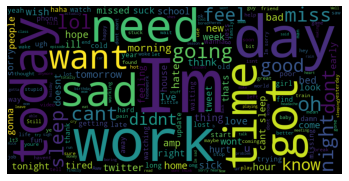

In [ ]:
wc=WordCloud(width=800, height=400).generate(x)
plt.imshow(wc)
plt.axis('off')
plt.show()


# spelling correction

In [ ]:
from textblob import TextBlob

In [ ]:
x=" tanks for watchin this wideo"

In [ ]:
x=TextBlob(x).correct()
x

TextBlob(" tanks for watching this wide")

# Tokenization

In [ ]:
x='thanks for watching my videos'
TextBlob(x).words

WordList(['thanks', 'for', 'watching', 'my', 'videos'])

In [ ]:
#spacy:
doc=nlp(x)
for t in doc:
    print(t)

thanks
for
watching
my
videos


# Lemmatization:

In [ ]:
x='thank you for watching my videos'
def base(x):
    x_list=[]
    doc=nlp(x)
    
    for t in doc:
        lemma=str(t.lemma_)
        if lemma=='-PRON-'or lemma=="be":
            lemma=t.text
        x_list.append(lemma)
    print(x_list)
        

In [ ]:
base(x)

['thank', 'you', 'for', 'watch', 'my', 'video']


In [ ]:
from textblob import Word
 

In [ ]:
for t in x.split():
    print(Word(t).lemmatize())
 

thank
you
for
watching
my
video


In [ ]:
doc=nlp(x)
for t in doc:
    print(t.lemma_)

thank
-PRON-
for
watch
-PRON-
video


# Enteties:

In [ ]:
x="Donal Trump and Barak Obama are from the Southern part of Texas and Trum has Microsoft in his name"
doc=nlp(x)

for ent in doc.ents:
    print(ent.text, "--", ent.label_, "--", str(spacy.explain(ent.label_)))

Barak Obama -- PERSON -- People, including fictional
Southern -- NORP -- Nationalities or religious or political groups
Texas -- GPE -- Countries, cities, states
Trum -- ORG -- Companies, agencies, institutions, etc.
Microsoft -- ORG -- Companies, agencies, institutions, etc.


In [ ]:
from spacy import displacy

In [ ]:
displacy.render(doc, style='ent')

# noun detection

In [ ]:
x

'Donal Trump and Barak Obama are from the Southern part of Texas and Trum has Microsoft in his name'

In [ ]:
for noun in doc.noun_chunks:
    print(noun)

Donal Trump
Barak Obama
the Southern part
Texas
Trum
Microsoft
his name


# translation and lang detection

In [ ]:
tb=TextBlob(x)
tb.detect_language()

'en'

In [ ]:
tb.translate(to='fr')

TextBlob("Donal Trump et Barak Obama sont originaires du sud du Texas et Trum a Microsoft à son nom")

# use inbuild sentiment classifier:

In [ ]:
from textblob.sentiments import NaiveBayesAnalyzer
 

In [ ]:
x='we all stand together to fight Covid-19 and we will win'

In [ ]:
tb=TextBlob(x, analyzer=NaiveBayesAnalyzer())

In [ ]:
tb.sentiment

Sentiment(classification='pos', p_pos=0.698176480823015, p_neg=0.3018235191769856)

# Advanced TXT processing:

In [ ]:
#1.ngram:
x='thanks for watching'
tb=TextBlob(x)
tb.ngrams(2)

[WordList(['thanks', 'for']), WordList(['for', 'watching'])]

In [ ]:
#2.bag of words:
x=['I am not your enemy','you should trust yourself','you only have you','positive thoughts for you']
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(ngram_range=(1,1))
vector=cv.fit_transform(x)


In [ ]:
vector.toarray()

array([[1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1],
       [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0]])

In [ ]:
cv.get_feature_names()

['am',
 'enemy',
 'for',
 'have',
 'not',
 'only',
 'positive',
 'should',
 'thoughts',
 'trust',
 'you',
 'your',
 'yourself']

In [ ]:
bow=pd.DataFrame(vector.toarray(), columns=cv.get_feature_names())

In [ ]:
bow

,am,enemy,for,have,not,only,positive,should,thoughts,trust,you,your,yourself
0,1,1,0,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,1,1,0,1
2,0,0,0,1,0,1,0,0,0,0,2,0,0
3,0,0,1,0,0,0,1,0,1,0,1,0,0


# TFIDF

In [ ]:
x

['I am not your enemy',
 'you should trust yourself',
 'you only have you',
 'positive thoughts for you']

In [ ]:
 bow.shape

(4, 13)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
x

['I am not your enemy',
 'you should trust yourself',
 'you only have you',
 'positive thoughts for you']

In [ ]:
tfid=TfidfVectorizer()
vect=tfid.fit_transform(x)

In [ ]:
tfidf=pd.DataFrame(vect.toarray(), columns=tfid.get_feature_names())
tfidf

,am,enemy,for,have,not,only,positive,should,thoughts,trust,you,your,yourself
0,0.5,0.5,0.000000,0.00000,0.5,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.5,0.000000
1,0.0,0.0,0.000000,0.00000,0.0,0.00000,0.000000,0.541736,0.000000,0.541736,0.345783,0.0,0.541736
2,0.0,0.0,0.000000,0.52489,0.0,0.52489,0.000000,0.000000,0.000000,0.000000,0.670061,0.0,0.000000
3,0.0,0.0,0.541736,0.00000,0.0,0.00000,0.541736,0.000000,0.541736,0.000000,0.345783,0.0,0.000000


# WordEmbbeding:

In [ ]:
nlp=spacy.load('en_core_web_lg')

In [ ]:
doc=nlp('hey I am graduating in December and I only want to find a job')
for t in doc:
    print(t.text, t.has_vector)

hey True
I True
am True
graduating True
in True
December True
and True
I True
only True
want True
to True
find True
a True
job True


In [ ]:
#check size of vector
t.vector.shape

(300,)

In [ ]:
nlp('NLP').vector

array([-1.0566e-01,  3.7785e-01, -1.0228e-02,  4.5650e-01,  4.8863e-01,
        1.6889e-01,  1.4674e-01, -5.9620e-01,  6.7585e-01, -6.3618e-01,
       -5.0792e-01, -7.4938e-03, -1.7841e-01, -5.5094e-01,  2.6550e-01,
       -1.2943e-01, -2.5246e-01, -1.8112e-01, -2.2629e-01, -5.4580e-01,
        8.3134e-02,  4.8255e-01,  1.5798e-01, -1.4961e-01, -3.8963e-01,
        2.1353e-01,  3.8718e-01, -8.2669e-02,  4.7962e-02, -2.8362e-01,
       -1.2079e-02, -7.0894e-01,  2.7506e-01,  3.1675e-01,  3.1739e-01,
        4.1278e-01,  6.6155e-01,  2.5729e-01, -3.8667e-01, -3.1865e-01,
        2.2205e-01, -8.6112e-01, -4.4753e-01,  6.2978e-01,  4.1762e-01,
        3.5762e-01,  5.0012e-02,  2.0502e-02, -5.2038e-02, -6.0737e-01,
        1.6322e-01, -2.6724e-01, -2.8658e-01,  2.1772e-01, -5.1363e-02,
        5.1384e-01,  1.6027e-01,  1.2481e+00, -8.4226e-02, -1.7538e-01,
       -4.1476e-01,  2.7219e-01, -1.6987e-01, -1.0548e+00,  6.6929e-01,
        3.9349e-01,  2.0599e-01, -6.7270e-02, -5.0668e-01, -1.46

In [ ]:
# calculate similarities:
for t1 in doc:
    for t2 in doc:
        print(t1.text, t2.text, t1.similarity(t2))
    print()

hey hey 1.0
hey I 0.66120166
hey am 0.4369318
hey graduating 0.14047709
hey in 0.13122094
hey December 0.29844344
hey and 0.18395592
hey I 0.66120166
hey only 0.31861728
hey want 0.50932026
hey to 0.2330528
hey find 0.32497293
hey a 0.24439445
hey job 0.35938326

I hey 0.66120166
I I 1.0
I am 0.50217736
I graduating 0.21392976
I in 0.27834255
I December 0.41845933
I and 0.31607857
I I 1.0
I only 0.4433158
I want 0.57952505
I to 0.3457753
I find 0.41908723
I a 0.30590194
I job 0.37069726

am hey 0.4369318
am I 0.50217736
am am 1.0
am graduating 0.21223421
am in 0.26766586
am December 0.20510265
am and 0.22571708
am I 0.50217736
am only 0.36254632
am want 0.4278975
am to 0.2759338
am find 0.3677954
am a 0.2615141
am job 0.3142031

graduating hey 0.14047709
graduating I 0.21392976
graduating am 0.21223421
graduating graduating 1.0
graduating in 0.27122733
graduating December 0.17602736
graduating and 0.16151243
graduating I 0.21392976
graduating only 0.21072064
graduating want 0.19928339


# Machine learning models:

In [ ]:
# with bow:
data.shape


(1048576, 14)

In [ ]:
# just use part of that data:
data0=data[data['sentiment']==0].sample(2000)
data1=data[data['sentiment']==4].sample(2000)

In [ ]:
Data=data0.append(data1)

In [ ]:
Data.shape

(4000, 14)

In [ ]:
Data.sample(2)

,tweets,sentiment,word_counts,char_counts,avg_len,stop_wd_count,count_mention,hashtag_count,count_digit,count_uppercase,emails,email_count,Url,Url_count
1020689,theelfinpoet You SO welcome,4,5,36,5.800000,1,1,0,0,1,[],0,[],0
818119,12 hours opera rehearsal Wow,4,7,40,4.714286,1,0,0,1,0,[],0,[],0


In [ ]:
Data_feat=Data.drop(labels=['tweets','sentiment','Url','emails'], axis=1).reset_index(drop=True)

In [ ]:
Data_feat

,word_counts,char_counts,avg_len,stop_wd_count,count_mention,hashtag_count,count_digit,count_uppercase,email_count,Url_count
0,18,107,4.777778,5,0,0,0,2,0,0
1,11,52,3.636364,0,0,0,0,8,0,0
2,24,121,4.041667,6,0,0,0,5,0,0
3,18,107,4.944444,12,1,0,0,0,0,0
4,15,65,3.333333,6,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
3995,7,38,4.428571,3,0,0,0,0,0,0
3996,8,46,4.750000,5,0,0,0,0,0,0
3997,6,37,5.166667,1,1,0,0,0,0,0
3998,15,90,5.000000,6,1,0,0,1,0,0


In [ ]:
y=Data['sentiment']

# Extract features:

In [ ]:
#1bow
cv=CountVectorizer()
vectorized=cv.fit_transform(Data['tweets'])
dataframe_bow=pd.DataFrame(vectorized.toarray(), columns=cv.get_feature_names())#get feature name gets each unique word in bow
dataframe_bow

,0220,08,09,0boy,0n,0nlihuman,0quot,10,100,1000,...,zomperific,zoo,zooey,zuckerbaby,zzack,zzap,zzz,zzzzs,zzzzz,zzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
vectorized.toarray().shape

(4000, 9791)

 # ML Algorithms 

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#initializing:
sgd=SGDClassifier(n_jobs=-1, random_state=42, max_iter=200)
lg=LogisticRegression(random_state=42, max_iter=200)
lgcv=LogisticRegressionCV(cv=2, random_state=42, max_iter=1000)
svm=LinearSVC(random_state=42, max_iter=200)
rfc=RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=200)

In [ ]:
#put all model in for loop:
clf={'SGD':sgd,"LG":lg,"LGCV":lgcv,"SVM":svm,"RF":rfc}

In [ ]:
clf.keys()

dict_keys(['SGD', 'LG', 'LGCV', 'SVM', 'RF'])

# Training:
 

In [ ]:
def classify(X,y):
    scaler=MinMaxScaler(feature_range=(0,1))
    X=scaler.fit_transform(X)
    
    X_train, X_test,y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    for key in clf.keys():
        clf[key].fit(X_train,y_train)
        y_pred=clf[key].predict(X_test)
        accu=accuracy_score(y_test, y_pred)
        print(key, "--->", accu)

In [ ]:
%%time
classify(dataframe_bow, y)

SGD ---> 0.67
LG ---> 0.68375
LGCV ---> 0.67875
SVM ---> 0.6775
RF ---> 0.6475
CPU times: user 3min 7s, sys: 1.56 s, total: 3min 9s
Wall time: 1min 1s
